Quiz Title: Bitcoin Price Forecasting with ARIMA

Quiz Description:

First collect bitcoin price from 2022-01-01T00:00:00Z till 2022-12-01T23:59:59Z within 1 hour interval you can use wallex or nobitex or coinbase.com or ...

Then Your task is to use the ARIMA (AutoRegressive Integrated Moving Average) model to forecast the price of Bitcoin for a future period accoarding to data that you collected.

Question 1: Perform a visual analysis of the dataset. Plot the time series of Bitcoin prices over the 12 months.

Question 2: Before applying ARIMA, what steps would you take to make the time series stationary? Do them all

Question 3: Apply the ARIMA model to the dataset. Choose appropriate values for p, d, and q.

Question 4: Forecast the Bitcoin price for the next 3 hours using your ARIMA model.

Question 5: Evaluate the performance of your ARIMA model. Calculate and explain appropriate evaluation metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for your forecast.

# Getting Data Wtih Requests

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
Before we could get started, using arima model, we need to get our data.
            <br/>
            For this section I have used the wallex website api document.(https://api-docs.wallex.ir/)The document for (ohlc) candles was like :
            <br/>
            Get request=> GET https://api.wallex.ir/v1/udf/history
            <br/>
            Parameters=>
                   symbol(str): there is a list of symbols in website . But for bitcoin we have chosen 'BTCUSDT' 
            <br/>
                   resolution (str): This represents the time intervals.As we want hourly data we need to use '60' which means
                   60 min (interval)
            <br/>
                   from(timestamp):represents candle's start time.our start time ==2022-01-01
            <br/>
                   to(timestamp):represnts candle's endt tiem.our end time == 2022-12-01
        </font>
    </font>
</div>

# Importing Libraries

In [60]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
startTime = int(dt.datetime(2022,1,1,0,0,0).timestamp())
startTime

1640982600

In [3]:
endTime = int(dt.datetime(2022,12,1,23,59,59).timestamp())
endTime

1669926599

In [4]:
symbol = 'BTCUSDT'
url = f'https://api.wallex.ir/v1/udf/history?symbol={symbol}&resolution=60&from={startTime}&to={endTime}'
response= requests.get(url)
response

<Response [200]>

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        The message 200 means that request was successfull.
        <br/>
        Now we can make a dataframe and start working with our data.
        </font>
    </font>
</div>

In [63]:
#response.text

In [6]:
data = response.json()

df=pd.DataFrame.from_dict(data, orient='columns')
df

,s,t,c,o,h,l,v
0,ok,1640984400,46850.0000000000000000,46850.0000000000000000,46850.0000000000000000,46850.0000000000000000,0E-16
1,ok,1640988000,46657.4500000000000000,47265.7000000000000000,47265.7000000000000000,46400.0000000000000000,0E-16
2,ok,1640991600,46000.0000000000000000,46100.0000000000000000,46176.7900000000000000,46000.0000000000000000,0E-16
3,ok,1640995200,45800.1100000000000000,45900.0000000000000000,45900.0000000000000000,45800.1100000000000000,0E-16
4,ok,1640998800,46146.4300000000000000,46124.8500000000000000,46155.7100000000000000,45946.2800000000000000,0E-16
...,...,...,...,...,...,...,...
7890,ok,1669910400,17003.3700000000000000,17000.0000000000000000,17018.9100000000000000,16987.6900000000000000,0.1478120000000000
7891,ok,1669914000,17003.3700000000000000,17003.3700000000000000,17003.3700000000000000,17003.3700000000000000,0E-16
7892,ok,1669917600,17003.3700000000000000,17003.3700000000000000,17003.3700000000000000,17003.3700000000000000,0E-16
7893,ok,1669921200,17000.3600000000000000,17000.3600000000000000,17000.3600000000000000,17000.3600000000000000,0.0012360000000000


In [7]:
df.dtypes

s    object
t     int64
c    object
o    object
h    object
l    object
v    object
dtype: object

In [8]:
df = df.iloc[:, 1:7]
df.columns = ['timestamp', 'close', 'open', 'high', 'low', 'volume']
df.index = [dt.datetime.fromtimestamp(x) for x in df['timestamp']]
df

,timestamp,close,open,high,low,volume
2022-01-01 00:30:00,1640984400,46850.0000000000000000,46850.0000000000000000,46850.0000000000000000,46850.0000000000000000,0E-16
2022-01-01 01:30:00,1640988000,46657.4500000000000000,47265.7000000000000000,47265.7000000000000000,46400.0000000000000000,0E-16
2022-01-01 02:30:00,1640991600,46000.0000000000000000,46100.0000000000000000,46176.7900000000000000,46000.0000000000000000,0E-16
2022-01-01 03:30:00,1640995200,45800.1100000000000000,45900.0000000000000000,45900.0000000000000000,45800.1100000000000000,0E-16
2022-01-01 04:30:00,1640998800,46146.4300000000000000,46124.8500000000000000,46155.7100000000000000,45946.2800000000000000,0E-16
...,...,...,...,...,...,...
2022-12-01 19:30:00,1669910400,17003.3700000000000000,17000.0000000000000000,17018.9100000000000000,16987.6900000000000000,0.1478120000000000
2022-12-01 20:30:00,1669914000,17003.3700000000000000,17003.3700000000000000,17003.3700000000000000,17003.3700000000000000,0E-16
2022-12-01 21:30:00,1669917600,17003.3700000000000000,17003.3700000000000000,17003.3700000000000000,17003.3700000000000000,0E-16
2022-12-01 22:30:00,1669921200,17000.3600000000000000,17000.3600000000000000,17000.3600000000000000,17000.3600000000000000,0.0012360000000000


In [9]:
df.open= df.open.astype("float32")
df.high = df.high.astype("float32")
df.low = df.low.astype("float32")
df.close= df.close.astype("float32")
df.volume= df.volume.astype("float32")
df

,timestamp,close,open,high,low,volume
2022-01-01 00:30:00,1640984400,46850.000000,46850.000000,46850.000000,46850.000000,0.000000
2022-01-01 01:30:00,1640988000,46657.449219,47265.699219,47265.699219,46400.000000,0.000000
2022-01-01 02:30:00,1640991600,46000.000000,46100.000000,46176.789062,46000.000000,0.000000
2022-01-01 03:30:00,1640995200,45800.109375,45900.000000,45900.000000,45800.109375,0.000000
2022-01-01 04:30:00,1640998800,46146.429688,46124.851562,46155.710938,45946.281250,0.000000
...,...,...,...,...,...,...
2022-12-01 19:30:00,1669910400,17003.369141,17000.000000,17018.910156,16987.689453,0.147812
2022-12-01 20:30:00,1669914000,17003.369141,17003.369141,17003.369141,17003.369141,0.000000
2022-12-01 21:30:00,1669917600,17003.369141,17003.369141,17003.369141,17003.369141,0.000000
2022-12-01 22:30:00,1669921200,17000.359375,17000.359375,17000.359375,17000.359375,0.001236


<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        I will be using the df['close'] column as the price value.
        </font>
    </font>
</div>

In [10]:
price=pd.DataFrame(df['close'])
price

,close
2022-01-01 00:30:00,46850.000000
2022-01-01 01:30:00,46657.449219
2022-01-01 02:30:00,46000.000000
2022-01-01 03:30:00,45800.109375
2022-01-01 04:30:00,46146.429688
...,...
2022-12-01 19:30:00,17003.369141
2022-12-01 20:30:00,17003.369141
2022-12-01 21:30:00,17003.369141
2022-12-01 22:30:00,17000.359375


# Question 1&2


<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        Stationary time series is when the mean and variance are constant over time. It is easier to predict when the series is stationary.when serie's mean value changes over time it means that it has trends. when the variance changes over time it means that it has timevarying seasonality.
            Trends and seasonality both are two factors which make a timeseries non-stationary.And we can not do any prediction on a non-stationary data.
            <br/>
            So,first we need to check if our data is stationary or not. 
            and if it's a non-stationary one we need to make it stationary.
        </font>
    </font>
</div>

# Checking Staionary

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        1.Visualization
        </font>
    </font>
</div>

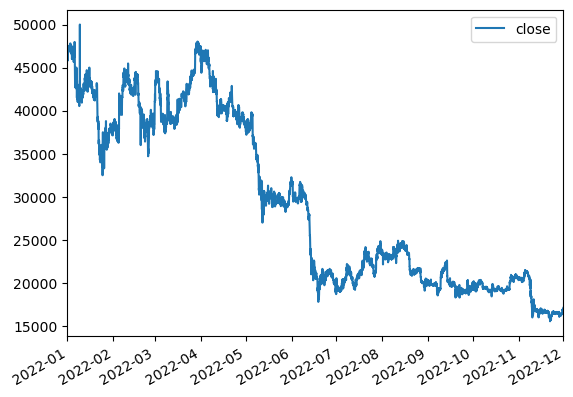

In [11]:
price.plot()
plt.xlim([dt.datetime(2022, 1, 1), dt.datetime(2022, 12, 1)]);

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        With just a quick look we can see that timeseries does not look constant over time.
        <br/>
         But we can resample our data daily.To check if we have trends and seasonality or not.
         For this I have used statsmodel tool.
        </font>
    </font>
</div>

In [12]:
days=price['close'].resample('D').sum()
days

2022-01-01    513766.96875
2022-01-02    614489.93750
2022-01-03    566088.12500
2022-01-04    929530.87500
2022-01-05    742114.81250
                  ...     
2022-11-27    396219.90625
2022-11-28    390550.28125
2022-11-29    343329.81250
2022-11-30    301654.59375
2022-12-01    409962.21875
Freq: D, Name: close, Length: 335, dtype: float32

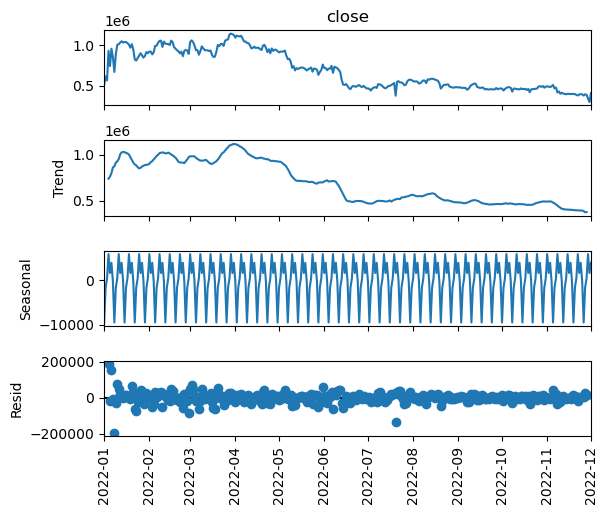

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(days, model='additive')
fig=decomposition.plot()
plt.xticks(rotation=90)
plt.show()


<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
         we have both trend and seasonality in this data.So it it non-stationary.
         <br/>
        But to be more certian , There is a statistical test called Augmented Dickey–Fuller test.It is also called unit root test.
        which shows how strongly a time series is defined by a trend.It returns a p_value which :
        <br/>
        if p-value > 0.05:the data has a unit root and is non-stationary.
        <br/>
        but if p-value <= 0.05: the data does not have a unit root and is stationary.
        </font>
    </font>
</div>

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        2.adfuller Test
        </font>
    </font>
</div>

In [14]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(price)
print(f'p-value: {adf_test[1]}')

p-value: 0.5621423560317003


<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        Now we are certian that our data is not-stationary
        </font>
    </font>
</div>

# Transform to stationary: differencing

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
            To make a non-stationary timeseries, stationary we need to diffrenciate it.
        </font>
    </font>
</div>

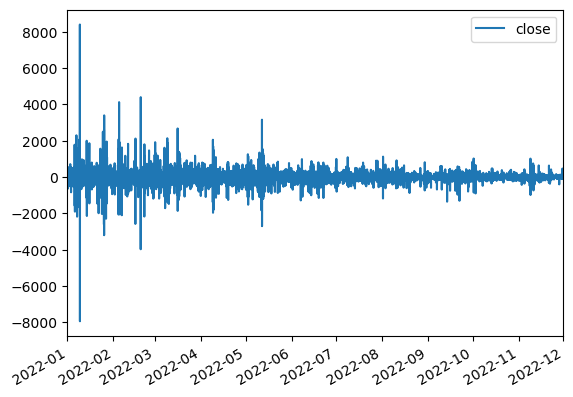

In [15]:
df_diff = price.diff().dropna()
df_diff.plot()
plt.xlim([dt.datetime(2022, 1, 1), dt.datetime(2022, 12, 1)]);

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
            There is a huge imporvement in mean and variation .But we need to be sure .
            so we use adfuller test again.
        </font>
    </font>
</div>

In [16]:
adf_test = adfuller(df_diff)
print(f'p-value: {adf_test[1]}')

p-value: 2.3306900854220907e-30


<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        Now that our timeseries is stationary. we can use arima model for it.
        </font>
    </font>
</div>

# Question 3

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
            ARIMA model has 3 components.
        <br/> 
            ==============================================
        <br/>    
            First: AR which stands for Auto Regression.
        <br/>
            AR model findes the correlation with its previous values.And it uses those previous values to predict future. But               how many previous values is the right amount?
        <br/>
            Here P order is defined. P is the number of previous values needed.how to find P?
         <br/>
            One classical method is plotting the partial auto correlation function or simply (PACF) .
            =========================================================================================
         <br/>
            Second: MA which stands for Moving Average.
         <br/>
            MA model says that present values of timeseries depend on the error of the previous lag values. But how many                   previous errors is the right amount?
         <br/>
           Here q order is defined. q is the number of previous value errors needed.how to find q? 
          <br/>
          One method is plotting the auto correlation function or simply (ACF) .
            ==========================================================================================
          <br/>
            Third: I which stands for Integrated.
          <br/>
            It is the opposite of Diffrentiated.Diffrentiating means subtracting values of one time by previous one.By doing
            this we are eliminating the effects of trends and seasonality.But when we are Differenciating, the original series
            changes.so we need to Integrate to go back to the original .
           <br/>
            Order of I is shown by d. it shows that what order we need to go back to the original series. or simply how many
            times we have 
            done the differenciating.           
        </font>
    </font>
</div>

# Finding p,d,q

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        In the plots below there would be a light_blue shade surrounding each value. That is confidence interval . any value that sparks out of it would be considered as a good candidate for p and q orders.
        </font>
    </font>
</div>

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        Finding q
        </font>
    </font>
</div>

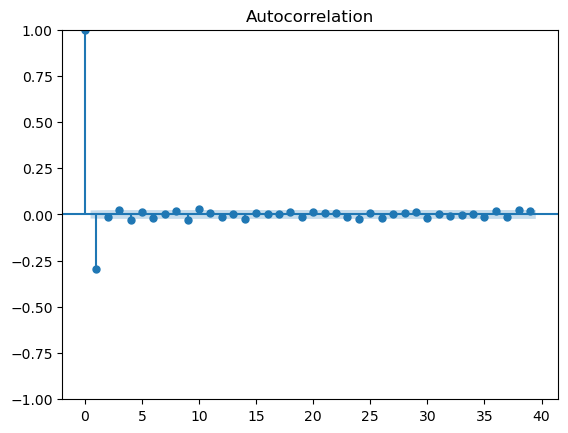

In [17]:
acf_diff = plot_acf(df_diff)


<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        I think 1 is good for P value as it has the highes spark
        </font>
    </font>
</div>

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        Finding p
        </font>
    </font>
</div>

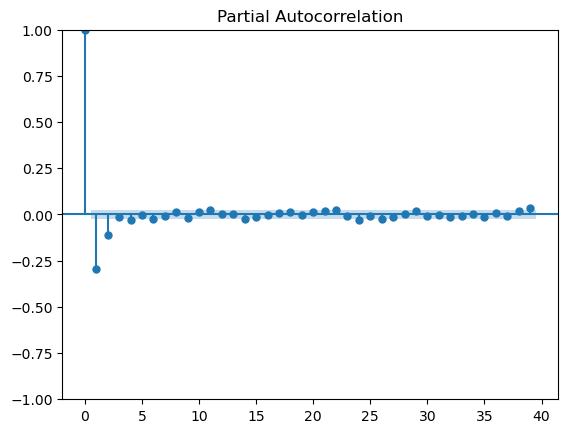

In [18]:
pacf_res = plot_pacf(df_diff)


<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        I think 1 and 2 is good for q value as they have the highes sparks.But 1 is higher.
        </font>
    </font>
</div>

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        Finding d
        </font>
    </font>
</div>

In [19]:
print('Order of d is:',ndiffs(price,test='adf'))

Order of d is: 1


<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        ndiffs can calculate the d order.
        but before this tool. we also could see in the plots above that after one diff the values were getting negative so one is quite enough.
        </font>
    </font>
</div>

In [44]:
df_train=price.iloc[:6395]
df_test=df['open'].iloc[6395:]#1500 values for test out of 7895

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        I have splited the dataset almost 80% for train and 20% for test.
        </font>
    </font>
</div>

# Training Model

In [21]:
model = ARIMA(df_train, order=(1,1,1))#(p,d,q)
model_fit = model.fit()


In [22]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 6395
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -46737.528
Date:                Mon, 09 Oct 2023   AIC                          93481.056
Time:                        23:01:15   BIC                          93501.345
Sample:                             0   HQIC                         93488.079
                               - 6395                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0247      0.017      1.480      0.139      -0.008       0.057
ma.L1         -0.3516      0.017    -20.691      0.000      -0.385      -0.318
sigma2      1.306e+05    500.349    261.014      0.0

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        what summury above tells us is that ar.L1 is the one auto regression part and ma.L1 is the moving average part.
        if their coeffiency were so close to zero they could be omitted.And also we can see the P-value which is better to be under 0.05 and near zero.
        </font>
    </font>
</div>

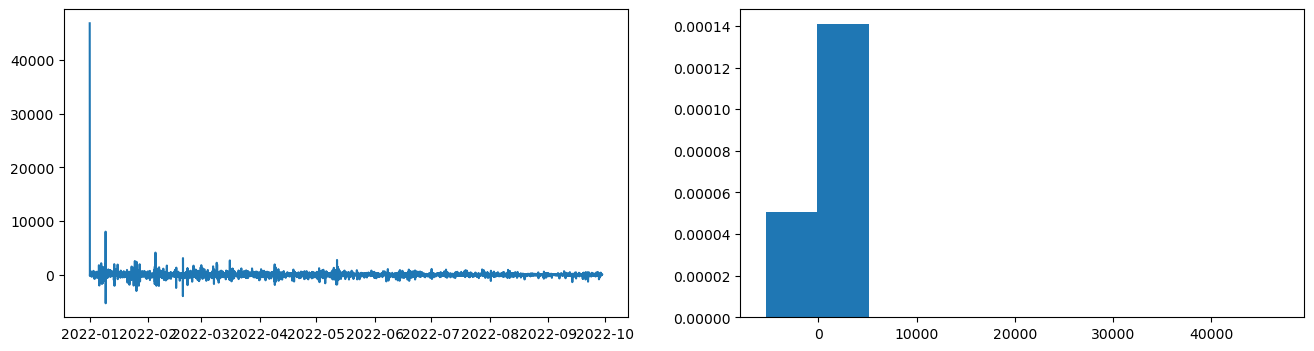

In [23]:
Residuals=pd.DataFrame(model_fit.resid)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4))

ax1.plot(Residuals)

ax2.hist(Residuals,density=True);

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        Residuals are the difference between the fitted values and the actual values.Residuals are not errors.errors are 
        the difference between the actual and forecasted values.These fitted values are the predictions the model made to the training data while fitting to it. As the model knows the values of all observations, it is no longer technically a forecast but rather a fitted value.And we can see that in plots above the residuals are distributed around mean of zero. and it's like a normal distribution.
        </font>
    </font>
</div>

# Question4

In [24]:
step=3
forecast_3_hours=model_fit.forecast(step)
forecast_3_hours

6395    19459.160457
6396    19458.868367
6397    19458.861155
Name: predicted_mean, dtype: float64

# Question5

In [27]:
forecast_test = model_fit.forecast(len(df_test))

In [53]:
mean_squared_error(forecast_test,df_test)

3250696.418916207

In [54]:
mean_absolute_error(forecast_test,df_test)

1374.6191619207525

In [61]:
mean_absolute_percentage_error(forecast_test,df_test)

0.07064232394381587

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
            As we can see our error is quite high .where we need a lower one.
        </font>
    </font>
</div>

<AxesSubplot:>

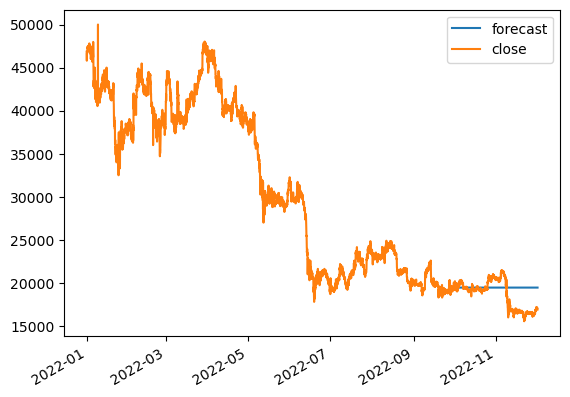

In [56]:
forecast_test = model_fit.forecast(len(df_test))
df['forecast'] = [None]*len(df_train) + list(forecast_test)

df[['forecast','close']].plot()

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
        I think the model couldn't caputred the seasonality and trend of our data.
        As I Unterstood it is difficult to find a good model with best prameters for a timeseries data.While reading and researching about them I found a python library.The Auto_fit arima can help us automate the 
        the steps to fit the arima model.
        </font>
    </font>
</div>

# Auto-fit the ARIMA model

In [48]:
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [50]:
print(auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6395
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -46729.733
Date:                Mon, 09 Oct 2023   AIC                          93473.467
Time:                        23:28:15   BIC                          93520.809
Sample:                             0   HQIC                         93489.855
                               - 6395                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.4947     10.881     -0.597      0.551     -27.820      14.831
ar.L1         -1.5090      0.029    -52.852      0.000      -1.565      -1.453
ar.L2         -0.9387      0.029    -32.505      0.0

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
            As you can see it has trained the data with SARIMA model. with (2,1,3) parameters. 
        </font>
    </font>
</div>

<AxesSubplot:>

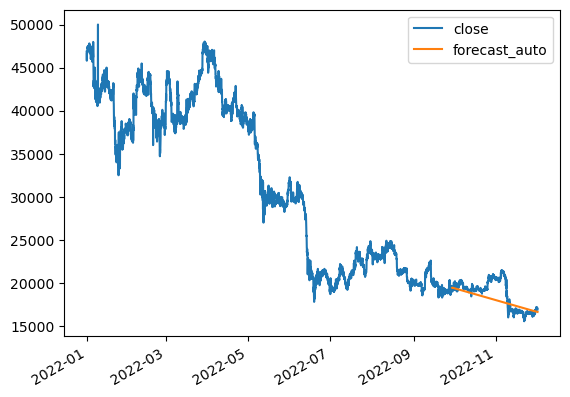

In [52]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
price['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

price.plot()

In [57]:
mean_squared_error(forecast_test_auto,df_test)

1891272.0151099835

In [59]:
mean_absolute_error(forecast_test_auto,df_test)

1013.6962955662574

In [62]:
mean_absolute_percentage_error(forecast_test_auto,df_test)

0.056442205941506986

<div dir = "ltr" style="direction:ltr;line-height:300%;">
    <font  color='blue' size=3>       
        <font>
          The plot above shows that this model has done much a better job. it has captured the trend of data but there is still
          some problem with seasonality.And also the errors are considerably less.    
        </font>
    </font>
</div>